In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, warnings
warnings.filterwarnings('ignore')

In [2]:
inp0= pd.read_csv(r'advertising.csv')

In [3]:
inp0.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
inp0.shape

(200, 4)

In [5]:
inp0.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
inp0.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Independent and Dependent var are linear or not

Text(0.5, 1.0, 'Newspaper vs Sales')

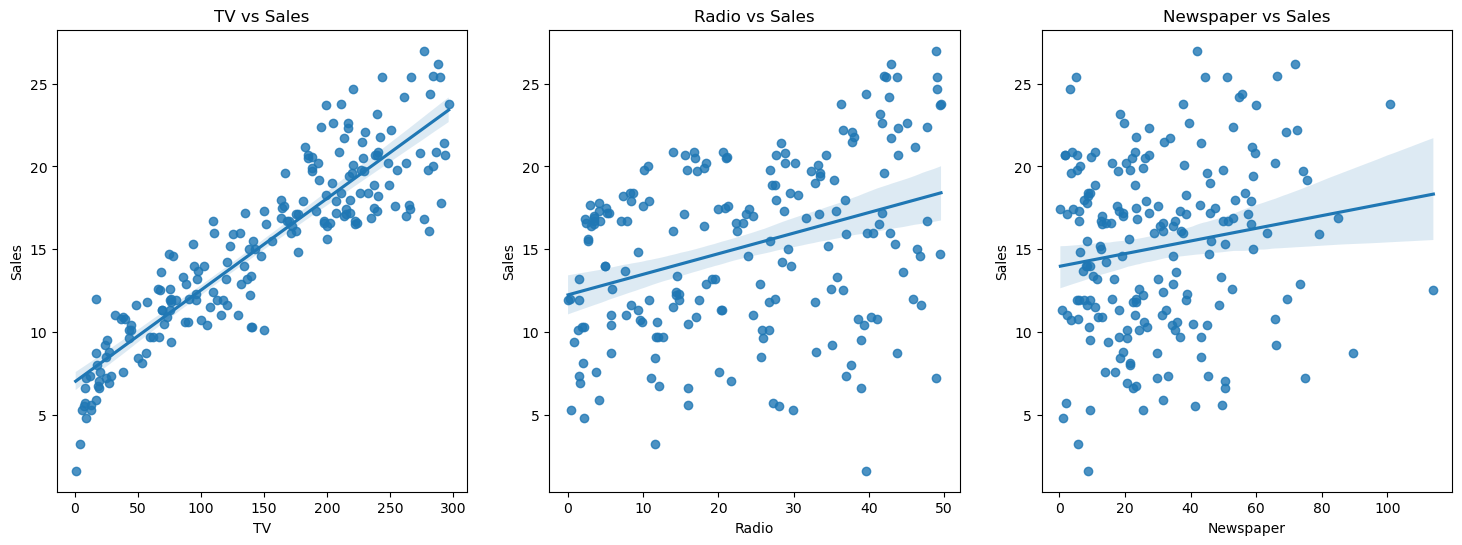

In [14]:
fix, (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=[18,6])
sns.regplot(data=inp0, x='TV', y='Sales', ax=ax1 )
ax1.set_title("TV vs Sales")

sns.regplot(data=inp0, x='Radio', y='Sales', ax=ax2 )
ax2.set_title("Radio vs Sales")

sns.regplot(data=inp0, x='Newspaper', y='Sales', ax=ax3 )
ax3.set_title("Newspaper vs Sales")


# The TV has a good linear relationship with target then tv and then newspaper

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr= LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Newspaper')

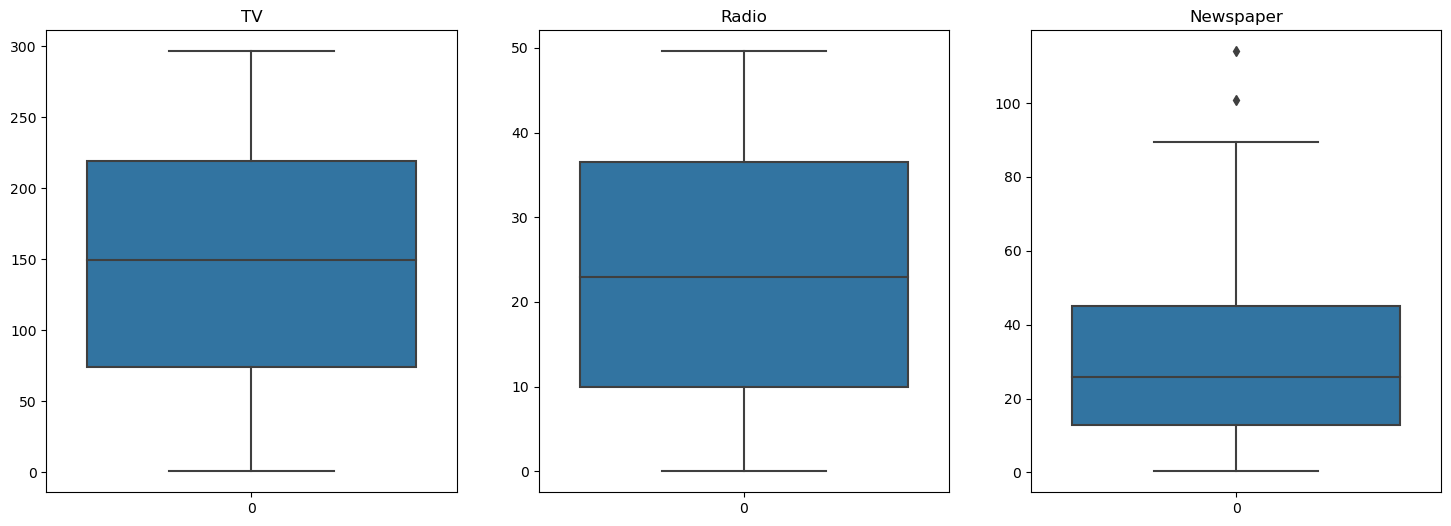

In [20]:
fix, (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=[18,6])
sns.boxplot(inp0.TV ,ax=ax1 )
ax1.set_title("TV")

sns.boxplot(inp0['Radio'],ax=ax2 )
ax2.set_title("Radio")

sns.boxplot(inp0['Newspaper'], ax=ax3 )
ax3.set_title("Newspaper")

In [28]:
# Masking the outliers of Newspaper
inp0["Newspaper"]=np.where(inp0.Newspaper>inp0.Newspaper.quantile(.99), inp0.Newspaper.median(), inp0.Newspaper)

Text(0.5, 1.0, 'Newspaper')

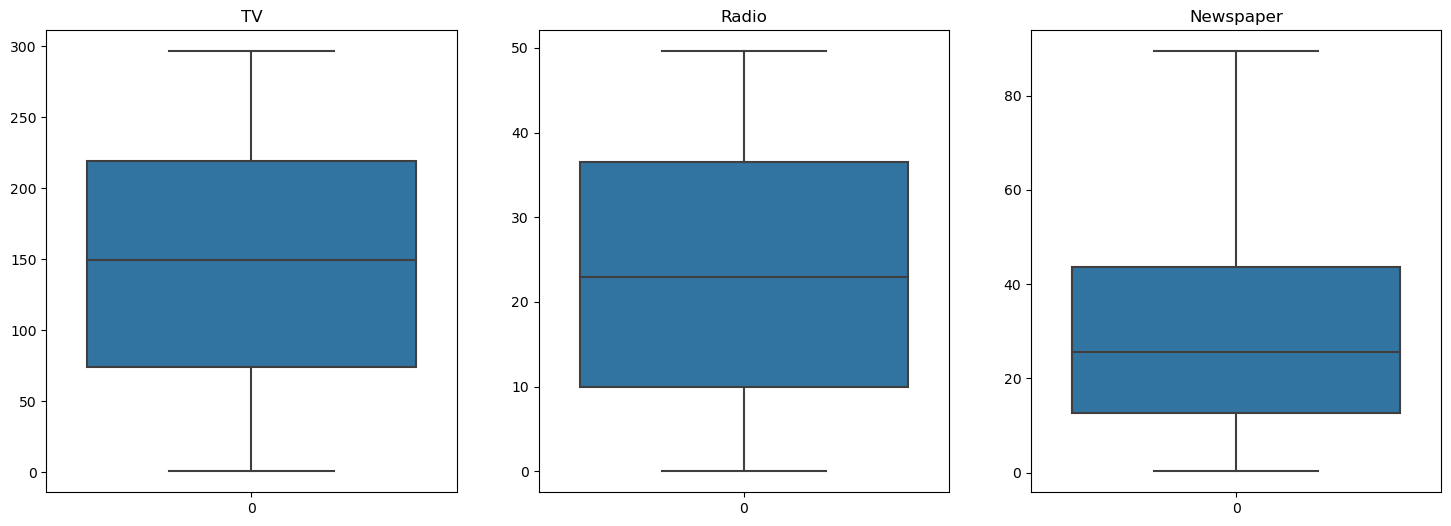

In [29]:
fix, (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=[18,6])
sns.boxplot(inp0.TV ,ax=ax1 )
ax1.set_title("TV")

sns.boxplot(inp0['Radio'],ax=ax2 )
ax2.set_title("Radio")

sns.boxplot(inp0['Newspaper'], ax=ax3 )
ax3.set_title("Newspaper")

<Axes: >

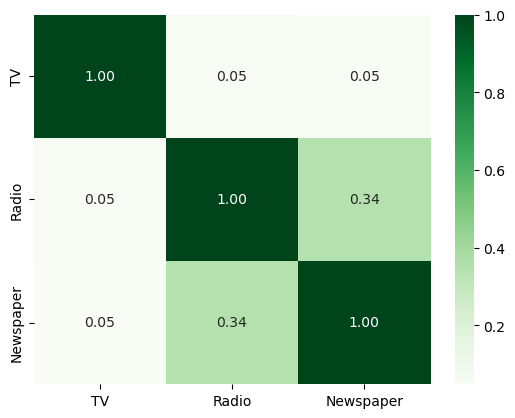

In [71]:
sns.heatmap(inp0.iloc[:, :-1].corr(), cmap="Greens", fmt=".2f", annot=True)

# There is no such relations in between the independent variables

In [45]:
# Model Creation
X=inp0[["TV"]]
Y= inp0[["Sales"]]
x_train, X_test, y_train, Y_test = train_test_split(X,Y)

In [46]:
model = lr.fit(x_train, y_train)

In [47]:
model

LinearRegression()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [49]:
y_pred = model.predict(x_train)

In [50]:
residual = y_train-y_pred

<Axes: ylabel='Density'>

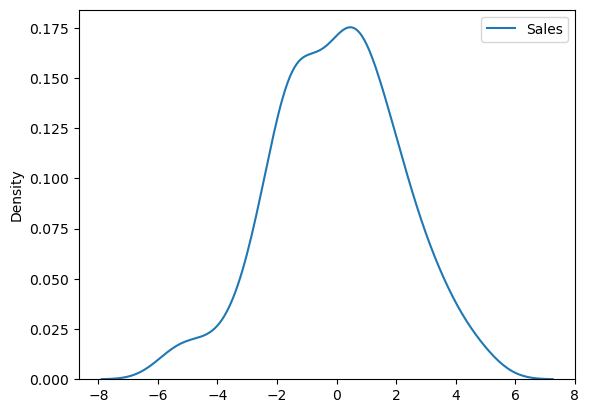

In [51]:
sns.kdeplot(residual)

In [53]:
residual.std()

Sales    2.107695
dtype: float64

# Residual are having the normal distribution with mean near to 0  

# Homoscedasticity

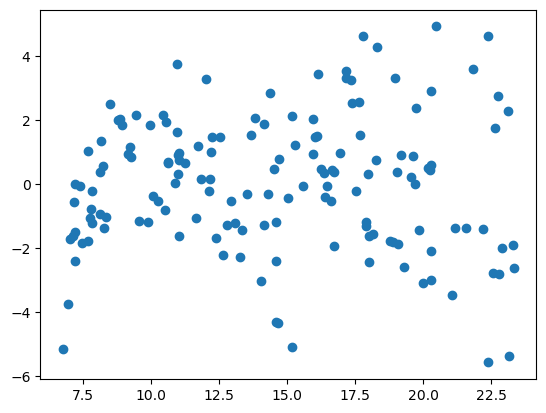

In [54]:
plt.scatter(y_pred, residual)

# Residual are almost spred uniformly

# Multicolinaerity

In [72]:
mean_absolute_error(y_train, y_pred)

1.6864409270970706

In [73]:
mean_squared_error(y_train, y_pred)

4.412762231915197

In [74]:
mean_absolute_percentage_error(y_train, y_pred)

0.1479000061767404

In [80]:
X=inp0[["TV", "Newspaper", "Radio"]]
Y= inp0[["Sales"]]
x_train, X_test, y_train, Y_test = train_test_split(X,Y)

In [82]:
model2=lr.fit(x_train, y_train)

In [83]:
y_pred=model2.predict(x_train)

In [84]:
mean_absolute_error(y_train, y_pred)

1.2222912651785538

In [85]:
residual = y_train-y_pred

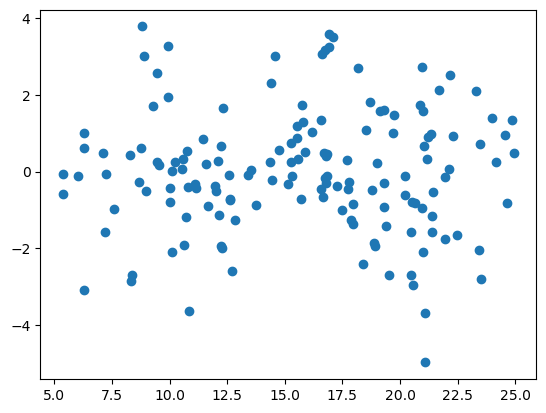

In [86]:
plt.scatter(y_pred, residual)

In [87]:
r2_score(y_train, y_pred)

0.9098578550585789

# Adjusted r2 score




In [104]:
class Adjusted_r2_score:
    def __init__(self, y_train, y_pred, x_train):
        self.y_train = y_train
        self.y_pred=y_train
        self.x_train=x_train
    def get_r2_score(self):
        r2=r2_score(self.y_train, self.y_pred)
        n = self.y_train.shape[0]
        k = self.x_train.shape[1]
        x=((1-r2)*(n-1))
        y=(n-1-k)
        adr2= 1-(x/y)
        print (adr2)
        
        
        


In [105]:
adr=Adjusted_r2_score(y_train, y_pred, x_train)

In [106]:
adr.get_r2_score()

1.0
